Iteration = 1, Loss = 6222.729408896111
Iteration = 1, Loss = 756.8752077899803
Iteration = 1, Loss = 98.18028439828343
Iteration = 1, Loss = 18.8003686719832
Iteration = 2, Loss = 9.234215860940491
Iteration = 3, Loss = 8.081381241837377
Iteration = 4, Loss = 7.942443025095993
Iteration = 5, Loss = 7.92569035964992
Iteration = 6, Loss = 7.92366238375586
Iteration = 7, Loss = 7.923408894113191
Iteration = 8, Loss = 7.9233692502913815
Iteration = 9, Loss = 7.923355378134529
Iteration = 10, Loss = 7.923344612660013
Iteration = 11, Loss = 7.923334222490682
Iteration = 12, Loss = 7.923323878465767
Iteration = 13, Loss = 7.92331354091772
Iteration = 14, Loss = 7.923303205066082
Iteration = 15, Loss = 7.923292870334663
Iteration = 16, Loss = 7.923282536653932
Iteration = 17, Loss = 7.923272204015415
Iteration = 18, Loss = 7.923261872418003
Iteration = 19, Loss = 7.923251541861469
Iteration = 20, Loss = 7.923241212345692


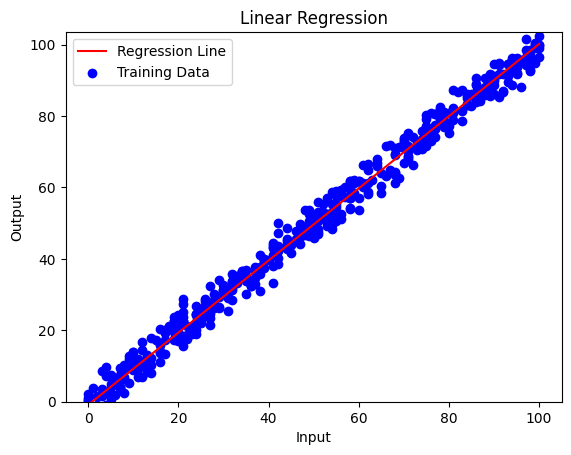

In [2]:
# 1. importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

file_path = "C:/Users/Rajal/Downloads/data_for_lr.csv"
data = pd.read_csv(file_path)

data = data.dropna() #dropping null values

# train test split    
train_input = np.array(data.x[0:500]).reshape(500, 1)   #slicing 1st 500 rows
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)   # 199 rows
test_output = np.array(data.y[500:700]).reshape(199, 1) # 199 rows



class LinearRegression: 
    def __init__(self): #constructor
        self.parameters = {}   #it will store slope(m) & intercept(c)

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c   #y=mx+c       y=prediction
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2)  # MSE formula  predcted value - output Y
        return cost #meausres how far from the true values

    def backward_propagation(self, train_input, train_output, predictions): #gradient descent
        derivatives = {} 
        df = (predictions-train_output) #error value finding
        dm = 2 * np.mean(np.multiply(train_input, df))  #mse
        dc = 2 * np.mean(df) #gradient decsent 
        derivatives['dm'] = dm #scalar numbers
        derivatives['dc'] = dc #scakar numbers
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

   #training function
    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='blue', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss


# training outside class pannanum then output iterate aagum
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 8840.649848890014
Iteration = 1, Loss = 1072.3049703431236
Iteration = 1, Loss = 136.13486894446237
Iteration = 1, Loss = 23.31618045594041
Iteration = 2, Loss = 9.720297480313798
Iteration = 3, Loss = 8.081842377785481
Iteration = 4, Loss = 7.884387462963898
Iteration = 5, Loss = 7.860588753008892
Iteration = 6, Loss = 7.857717505909266
Iteration = 7, Loss = 7.857368246157038
Iteration = 8, Loss = 7.857322913652853
Iteration = 9, Loss = 7.857314208016303
Iteration = 10, Loss = 7.857309916642576
Iteration = 11, Loss = 7.857306157562197
Iteration = 12, Loss = 7.857302462955571
Iteration = 13, Loss = 7.85729877644531
Iteration = 14, Loss = 7.857295091237287
Iteration = 15, Loss = 7.857291406512712
Iteration = 16, Loss = 7.857287722172876
Iteration = 17, Loss = 7.8572840382058455
Iteration = 18, Loss = 7.8572803546101575
Iteration = 19, Loss = 7.857276671385597
Iteration = 20, Loss = 7.857272988532106


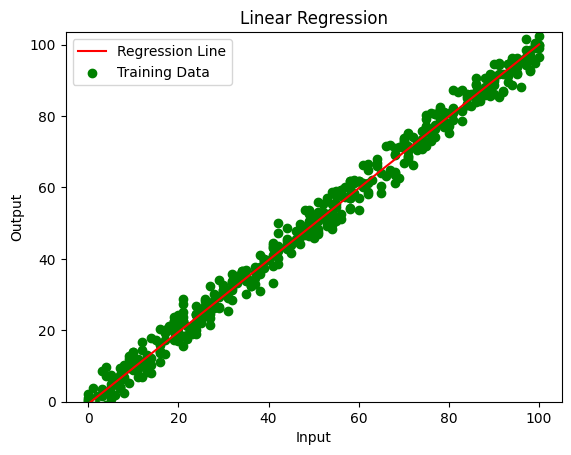

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

file_path = "C:/Users/Rajal/Downloads/data_for_lr.csv"
data = pd.read_csv(file_path)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(-1, 1)
train_output = np.array(data.y[0:500]).reshape(-1, 1)

test_input = np.array(data.x[500:700]).reshape(-1, 1)   # 199 rows
test_output = np.array(data.y[500:700]).reshape(-1, 1) # 199 rows



class LinearRegression: 
    def __init__(self):   # <-- fixed constructor
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss


# -------- run the training here (outside class) ----------
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)